# Python 股價預測模型

<h1 id="索引">索引<a class="anchor-link" href="#索引"></a></h1>

<p style="font-weight:bold;"><a href="#1.-資料整理">1. 資料整理</a></p>
<p style="font-weight:bold;"><a href="#2.-訓練資料">2. 訓練資料</a></p>
<p style="font-weight:bold;"><a href="#3.-各模型訓練狀況">3. 各模型訓練狀況</a></p>
<p style="font-weight:bold;"><a href="#4.-XGBoost樹視覺化">4. XGBoost樹視覺化</a></p>
<p style="font-weight:bold;"><a href="#5.-交叉驗證">5. 交叉驗證</a></p>
<p style="font-weight:bold;"><a href="#6.-混亂矩陣">6. 混亂矩陣</a></p>
<p style="font-weight:bold;"><a href="#7.-F1分數">7. F1分數</a></p>
<p style="font-weight:bold;"><a href="#8.-實際漲跌VS預計漲跌圖表">8. 實際漲跌VS預計漲跌圖表</a></p>

<p style="font-weight:bold;color:#FFBB00;color:#FFBB00;font-size:18px;">Import所需套件</p>

In [1]:
import pandas as pd
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,GradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from numpy import loadtxt
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.font_manager import FontProperties 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

# 安裝並import本次專題所需採用的套件

<h2 id="1.-資料整理" style="color:#E63F00">1. 資料整理<a class="anchor-link" href="#1.-資料整理"></a></h2>

In [2]:
file = 'TextMiningDataset.xlsx' 

# 匯入資料集

In [3]:
xl = pd.ExcelFile(file)

# 使用Pandas的Function讀取資資料

In [4]:
print(xl.sheet_names)

# 印出該頁面名稱

['TEST']


In [5]:
df1 = xl.parse('TEST')

In [6]:
df2 = df1.fillna(0)

# 填補空值

In [7]:
y = df2.iloc[:, 226]
X = df2.iloc[:, 3:226]
#將資料集切出特徵值X  以及目標值y

In [8]:
X

,良率提升,穩定,量產,維持,高檔,7奈米,張忠謀,弊案,收賄,法說,...,量縮,不足,低迷,砍單,4奈米,大盤,S&P,費半,TSM,APPL
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109104,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,2.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109104,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.175840,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.175840,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.082164,1.201894,0.119411,-0.152922,0.119411
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.688065,-0.347346,-0.922800,1.488702,-0.922800
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.706692,-0.347346,-0.922800,1.488702,-0.922800
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.308091,0.675695,0.573881,-0.658774,0.573881
8,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.226490,-0.163463,0.317668,-0.026556,0.317668
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,3.946034,0.511679,0.217858,0.192903,0.217858


In [9]:
y

0      持平
1      持平
2      下跌
3      下跌
4      下跌
5      持平
6      下跌
7      持平
8      下跌
9      上漲
10     下跌
11     下跌
12     下跌
13     下跌
14     下跌
15     持平
16     持平
17     下跌
18     下跌
19     下跌
20     下跌
21     上漲
22     上漲
23     持平
24     持平
25     下跌
26     下跌
27     下跌
28     下跌
29     下跌
       ..
142    上漲
143    下跌
144    持平
145    持平
146    持平
147    下跌
148    下跌
149    下跌
150    上漲
151    上漲
152    上漲
153    上漲
154    上漲
155    上漲
156    持平
157    上漲
158    上漲
159    持平
160    持平
161    持平
162    持平
163    持平
164    上漲
165    持平
166    持平
167    持平
168    持平
169    上漲
170    持平
171    上漲
Name: 漲跌, Length: 172, dtype: object

<a href="#索引">回索引</a>

<h2 id="2.-訓練資料" style="color:#E63F00">2. 訓練資料<a class="anchor-link" href="#2.-訓練資料"></a></h2>

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [11]:
X_test


,良率提升,穩定,量產,維持,高檔,7奈米,張忠謀,弊案,收賄,法說,...,量縮,不足,低迷,砍單,4奈米,大盤,S&P,費半,TSM,APPL
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.957379,-0.426096,0.310252,-0.497696,0.310252
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109104,0.000000,0.000000,0.000000,0.000000
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.018529,1.057441,0.340875,-0.005923,0.340875
134,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.006355,-0.118135,0.291342,-0.008733,0.291342
33,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.995370,0.687408,-0.193147,1.440221,-0.193147
8,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.226490,-0.163463,0.317668,-0.026556,0.317668
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.962190,0.616452,0.931756,0.122803,0.931756
18,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-6.481557,0.000000,0.000000,0.000000,0.000000
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.477958,0.229579,1.448206,1.868662,1.448206
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.689188,-0.361002,0.507966,0.118996,0.507966


<a href="#索引">回索引</a>

<h2 id="3.-各模型訓練狀況" style="color:#E63F00">3. 各模型訓練狀況<a class="anchor-link" href="#3.-各模型訓練狀況"></a></h2>

<p style="font-weight:bold;color:#003C9D;">A. 以GBDT演算法預測漲跌</p>

In [12]:
params = {'n_estimators':50, 'max_depth':6, 'learning_rate' :0.01}

clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
clf.predict(X_test)

array(['上漲', '持平', '上漲', '上漲', '上漲', '持平', '上漲', '下跌', '上漲', '上漲', '持平',
       '持平', '下跌', '上漲', '持平', '上漲', '上漲', '持平', '下跌', '持平', '上漲', '持平',
       '上漲', '上漲', '持平', '下跌', '下跌', '上漲', '持平', '上漲', '持平', '持平', '持平',
       '上漲', '持平'], dtype=object)

In [13]:
clf.score(X_test, y_test)
# 測試GBDT預測精確度

0.7142857142857143

<p style="font-weight:bold;color:#003C9D;">B. 以Random Forest演算法預測漲跌</p>

In [14]:
elf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=10)
elf = elf.fit(X,y)
elf.predict(X_test)

array(['持平', '持平', '上漲', '持平', '上漲', '下跌', '上漲', '下跌', '上漲', '上漲', '持平',
       '持平', '持平', '上漲', '持平', '上漲', '上漲', '持平', '持平', '下跌', '上漲', '持平',
       '上漲', '上漲', '持平', '下跌', '下跌', '上漲', '持平', '上漲', '持平', '持平', '持平',
       '上漲', '持平'], dtype=object)

In [15]:
elf.score(X_test, y_test)
# 測試Random Forest預測精確度

0.8571428571428571

<p style="font-weight:bold;color:#003C9D;">C. 以SVM演算法預測漲跌</p>

In [16]:
dlf = SVC(kernel='rbf', probability=True)
dlf = dlf.fit(X,y)
dlf.predict(X_test)

array(['持平', '持平', '上漲', '持平', '上漲', '下跌', '上漲', '下跌', '上漲', '持平', '持平',
       '持平', '下跌', '上漲', '持平', '上漲', '上漲', '持平', '下跌', '持平', '上漲', '持平',
       '上漲', '上漲', '持平', '持平', '下跌', '上漲', '持平', '上漲', '持平', '持平', '持平',
       '上漲', '持平'], dtype=object)

In [17]:
dlf.score(X_test, y_test)
# 測試SVM預測精確度

0.7142857142857143

<p style="font-weight:bold;color:#003C9D;">D. 以Voting集成演算法預測漲跌</p>

In [18]:
flf = VotingClassifier(estimators=[('GradientBoostingClassifier', clf), ('RandomForestClassifier', elf), ('svc', dlf)], voting='soft', weights=[2,1,2])

In [19]:
flf = flf.fit(X,y)

In [20]:
flf.predict(X_test)


array(['持平', '持平', '上漲', '下跌', '上漲', '下跌', '上漲', '下跌', '上漲', '上漲', '持平',
       '持平', '持平', '上漲', '持平', '上漲', '上漲', '持平', '持平', '下跌', '上漲', '下跌',
       '上漲', '上漲', '持平', '下跌', '下跌', '上漲', '持平', '上漲', '持平', '持平', '持平',
       '上漲', '持平'], dtype=object)

In [21]:
flf.score(X_test, y_test)
# 測試Voting預測精確度

0.91428571428571426

In [22]:
params1 = {
 'learning_rate' :0.01,
 'n_estimators':1000,
 'max_depth':6,
 'min_child_weight':6,
 'gamma':0,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'reg_alpha':0.005,
 'objective': 'binary:logistic',
 'nthread':4,
 'scale_pos_weight':1,
 'seed':7}

llf = XGBClassifier(**params1)

llf.fit(X, y)
llf.predict(X_test)

array(['持平', '持平', '上漲', '下跌', '上漲', '下跌', '上漲', '下跌', '上漲', '上漲', '持平',
       '下跌', '持平', '上漲', '持平', '上漲', '上漲', '持平', '持平', '下跌', '上漲', '下跌',
       '上漲', '上漲', '持平', '下跌', '下跌', '上漲', '持平', '上漲', '持平', '持平', '持平',
       '上漲', '持平'], dtype=object)

In [23]:
llf.score(X_test, y_test)
# 測試XGBoost預測精確度

0.94285714285714284

<a href="#索引">回索引</a>

<h2 id="4.-XGBoost樹視覺化" style="color:#E63F00">4. XGBoost樹視覺化<a class="anchor-link" href="#4.-XGBoost樹視覺化"></a></h2>

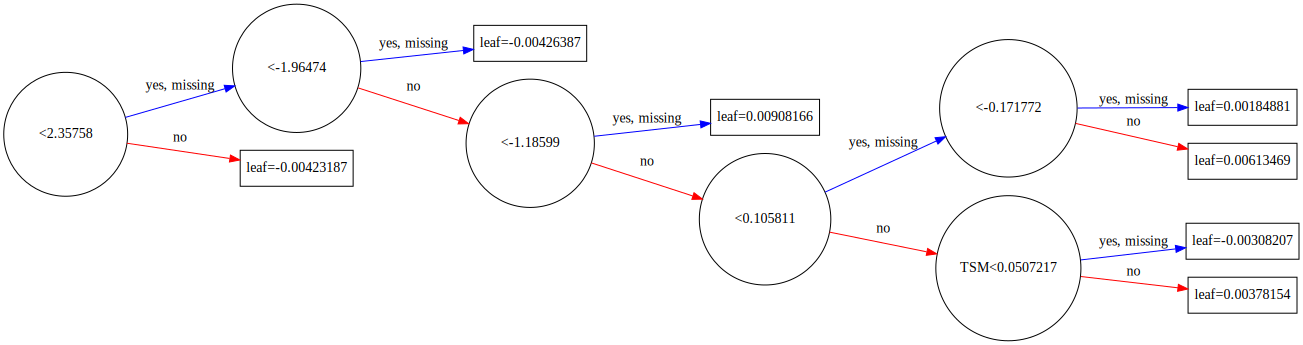

In [24]:
tree= xgb.to_graphviz(llf, num_trees=101 , rankdir='LR')
tree
# 1.以num_trees=n選擇第n棵樹的圖形 2.若將樹直立，則需要加rankdir='LR'


<a href="#索引">回索引</a>

<h2 id="5.-交叉驗證" style="color:#E63F00">5. 交叉驗證<a class="anchor-link" href="#5.-交叉驗證"></a></h2>

In [25]:
for lf, label in zip([clf, elf, dlf, flf, llf], ['GradientBoostingClassifier', 'RandomForestClassifier', 'svc', 'VotingClassifier', 'XGBoost']):
    scores = cross_val_score(lf, X, y, cv=20, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
# 檢查各數據集在一個標準差以內的交叉驗證精確程度

Accuracy: 0.6679 (+/- 0.22) [GradientBoostingClassifier]
Accuracy: 0.6047 (+/- 0.18) [RandomForestClassifier]
Accuracy: 0.6373 (+/- 0.20) [svc]
Accuracy: 0.6706 (+/- 0.20) [VotingClassifier]
Accuracy: 0.7006 (+/- 0.18) [XGBoost]


<a href="#索引">回索引</a>

<h2 id="6.-混亂矩陣" style="color:#E63F00">6. 混亂矩陣<a class="anchor-link" href="#6.-混亂矩陣"></a></h2>

<p style="font-weight:bold;color:#FFBB00;color:#FFBB00;font-size:18px;">參數設定</p>

In [26]:
t = list(y_test)
r = clf.predict(X_test) #GBDT
f = dlf.predict(X_test) #RandomForest
g = elf.predict(X_test) #SVM
m = flf.predict(X_test) #Voting
o = llf.predict(X_test) #XGBOOST

p = {'上漲':1, '持平' :0, '下跌' :-1}
t1 =[p.get(n, n) for n in t]
r1 =[p.get(n, n) for n in r]
f1 =[p.get(n, n) for n in f]
g1 =[p.get(n, n) for n in g]
m1 =[p.get(n, n) for n in m]
o1 =[p.get(n, n) for n in o]

#將上漲，下跌及持平預測值轉換為1,-1及0，後面圖形可使用


In [27]:

unique_elements, counts_elements = np.unique(t, return_counts=True)
unique1_elements, counts1_elements = np.unique(r, return_counts=True)
unique2_elements, counts2_elements = np.unique(f, return_counts=True)
unique3_elements, counts3_elements = np.unique(g, return_counts=True)
unique4_elements, counts4_elements = np.unique(m, return_counts=True)
unique5_elements, counts5_elements = np.unique(o, return_counts=True)


print(np.asarray((unique_elements, counts_elements, 't')))
print(np.asarray((unique1_elements, counts1_elements, 'r')))
print(np.asarray((unique2_elements, counts2_elements, 'f')))
print(np.asarray((unique3_elements, counts3_elements, 'g')))
print(np.asarray((unique4_elements, counts4_elements, 'm')))
print(np.asarray((unique5_elements, counts5_elements, 'o')))

# 取出測試資料的單一目標值

[array(['上漲', '下跌', '持平'],
      dtype='<U2')
 array([13,  9, 13], dtype=int64) 't']
[array(['上漲', '下跌', '持平'], dtype=object) array([16,  5, 14], dtype=int64)
 'r']
[array(['上漲', '下跌', '持平'], dtype=object) array([13,  5, 17], dtype=int64)
 'f']
[array(['上漲', '下跌', '持平'], dtype=object) array([14,  5, 16], dtype=int64)
 'g']
[array(['上漲', '下跌', '持平'], dtype=object) array([14,  7, 14], dtype=int64)
 'm']
[array(['上漲', '下跌', '持平'], dtype=object) array([14,  8, 13], dtype=int64)
 'o']


<p style="font-weight:bold;color:#003C9D;">A. GBDT混亂矩陣</p>

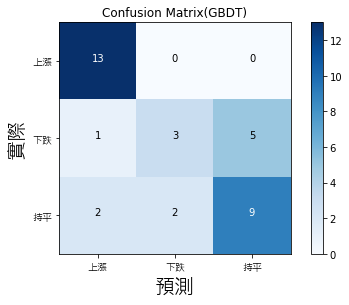

In [28]:
font = FontProperties(fname=r'C:/Users/genio/Algorithm/msjh.ttc')

# 匯入中文字體，將字體路徑帶入FontProperties函式裡

class_names = unique1_elements


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(GBDT)')


plt.show()

<p style="font-weight:bold;color:#003C9D;">B. Random Forest混亂矩陣</p>

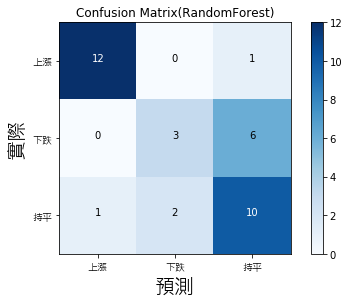

In [29]:
class_names = unique2_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,  fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, f)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(RandomForest)')


plt.show()

<p style="font-weight:bold;color:#003C9D;">C. SVM混亂矩陣</p>

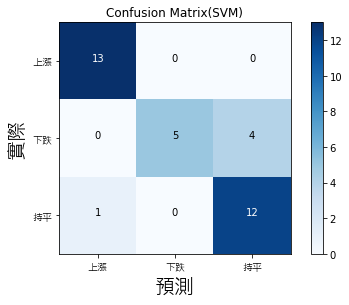

In [30]:
class_names = unique3_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# 計算混亂矩陣
cnf_matrix = confusion_matrix(t, g)
np.set_printoptions(precision=2)

# 繪出混亂矩陣
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(SVM)')

plt.show()


<p style="font-weight:bold;color:#003C9D;">D. Voting混亂矩陣</p>

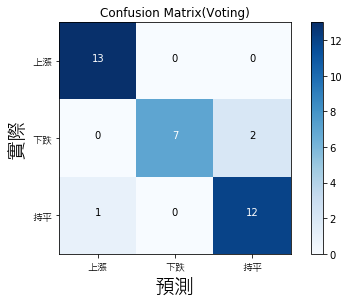

In [31]:
class_names = unique4_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, m)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix(Voting)')

plt.show()


<p style="font-weight:bold;color:#003C9D;">E. XGBoost混亂矩陣</p>

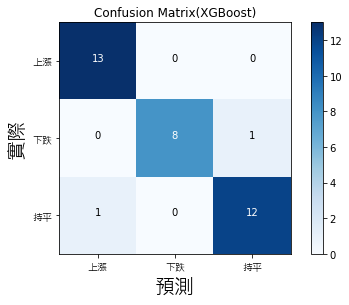

In [32]:

font = FontProperties(fname=r'C:/Users/genio/Algorithm/msjh.ttc')

class_names = unique5_elements

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,  fontproperties=font)
    plt.yticks(tick_marks, classes, fontproperties=font)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('實際', fontproperties=font, fontsize=20)
    plt.xlabel('預測',  fontproperties=font, fontsize=20)

# Compute confusion matrix
cnf_matrix = confusion_matrix(t, o)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                       title='Confusion Matrix(XGBoost)')

plt.show()


<a href="#索引">回索引</a>

<h2 id="7.-F1Score" style="color:#E63F00">7. F1分數<a class="anchor-link" href="#7.-F1Score"></a></h2>

<p style="font-weight:bold;color:#003C9D;">A. GBDT F1 Score</p>

In [33]:
target_names = '上漲', '持平', '下跌'
print(classification_report(t, r, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.81      1.00      0.90        13
         持平       0.60      0.33      0.43         9
         下跌       0.64      0.69      0.67        13

avg / total       0.69      0.71      0.69        35



<p style="font-weight:bold;color:#003C9D;">B. Random Forest F1 Score</p>

In [34]:
target_names = '上漲', '持平', '下跌'
print(classification_report(t, f, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.92      0.92      0.92        13
         持平       0.60      0.33      0.43         9
         下跌       0.59      0.77      0.67        13

avg / total       0.72      0.71      0.70        35



<p style="font-weight:bold;color:#003C9D;">C. SVM F1 Score</p>

In [35]:
target_names = '上漲', '持平', '下跌'
print(classification_report(t, g, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.93      1.00      0.96        13
         持平       1.00      0.56      0.71         9
         下跌       0.75      0.92      0.83        13

avg / total       0.88      0.86      0.85        35



<p style="font-weight:bold;color:#003C9D;">D. Voting F1 Score</p>

In [36]:
target_names ='上漲', '持平', '下跌'
print(classification_report(t, m, target_names=target_names))

             precision    recall  f1-score   support

         上漲       0.93      1.00      0.96        13
         持平       1.00      0.78      0.88         9
         下跌       0.86      0.92      0.89        13

avg / total       0.92      0.91      0.91        35



<p style="font-weight:bold;color:#003C9D;">E. XGBoost F1 Score</p>

In [37]:
target_names = '上漲', '持平', '下跌'
c= print(classification_report(t, o, target_names=target_names))


             precision    recall  f1-score   support

         上漲       0.93      1.00      0.96        13
         持平       1.00      0.89      0.94         9
         下跌       0.92      0.92      0.92        13

avg / total       0.94      0.94      0.94        35



<a href="#索引">回索引</a>

<h2 id="8.-實際漲跌VS預計漲跌圖表" style="color:#E63F00">8. 實際漲跌VS預計漲跌圖表<a class="anchor-link" href="#8.-實際漲跌VS預計漲跌圖表"></a></h2>

<p style="font-weight:bold;color:#003C9D;">A. GBDT 實際VS預計</p>

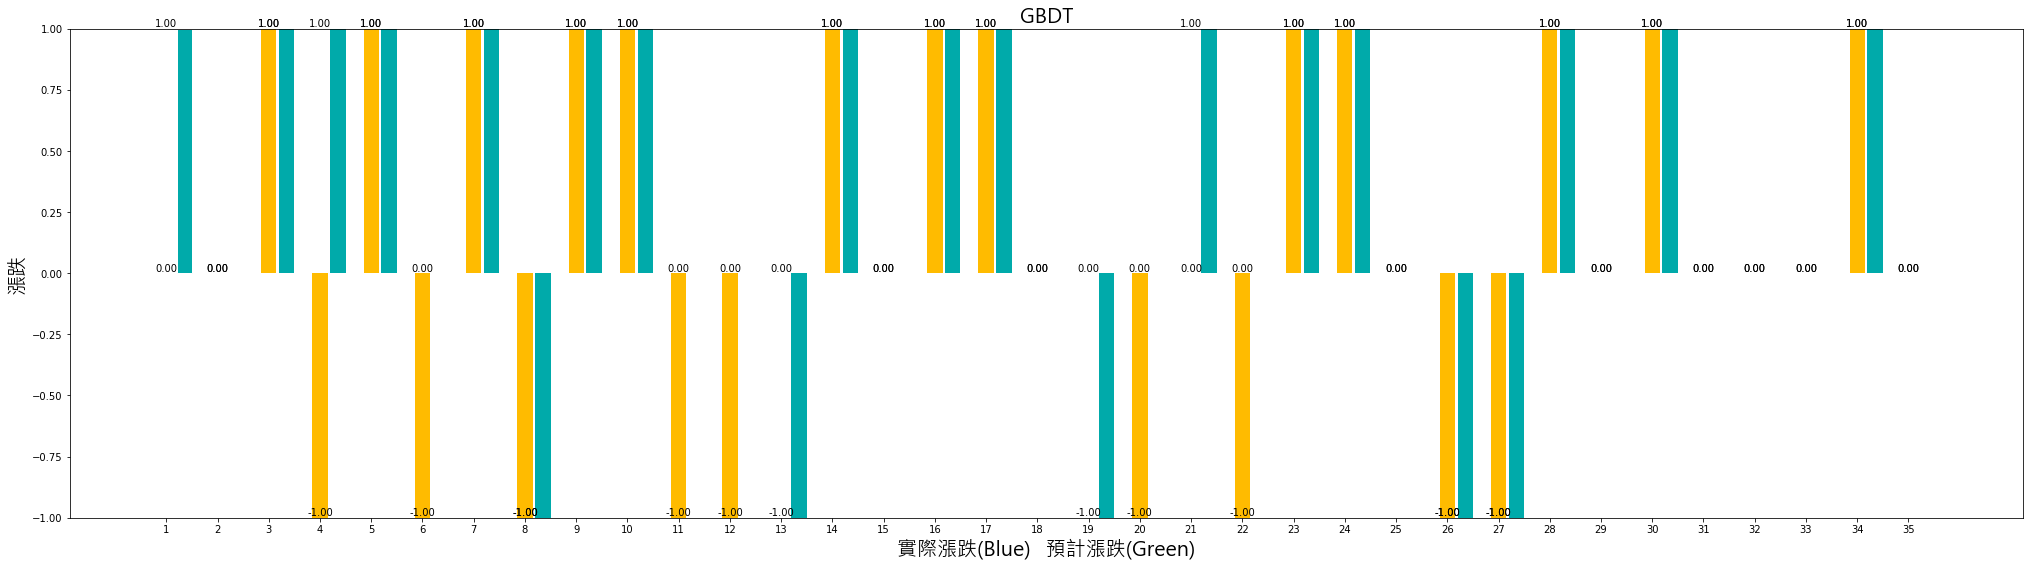

In [38]:

plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
#X是1-35 testing data柱狀圖的個數

objects = range(1,36)

#設定x軸1-35柱狀圖的標籤

y_pos = np.arange(len(objects))

#柱狀圖x軸每隔1個給1個標籤

plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')

#width:柱的寬度, t為測試資料的目標值

plt.bar(X+0.35,r1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')

#水平柱狀圖plt.bar，屬性中寬度width變成了高度height
#打兩組數據時用+
#facecolor柱狀圖裡填充的顏色
#edgecolor是邊框的顏色
#想把一組數據打到下邊，在數據前使用負號
#plt.bar(X, -Y2, width=width, facecolor='#ff9999', edgecolor='white')
#給圖加text

plt.xlabel('實際漲跌(Blue)   預計漲跌(Green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)

#給x軸和y軸加上label

plt.xticks(y_pos+1, objects)

#每組柱狀圖給標籤在上面

plt.title('GBDT',fontproperties=font, fontsize=20)

#標題GDBT

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,r1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
#y軸範圍

plt.show()

<p style="font-weight:bold;color:#003C9D;">B. Random Forest 實際VS預計</p>

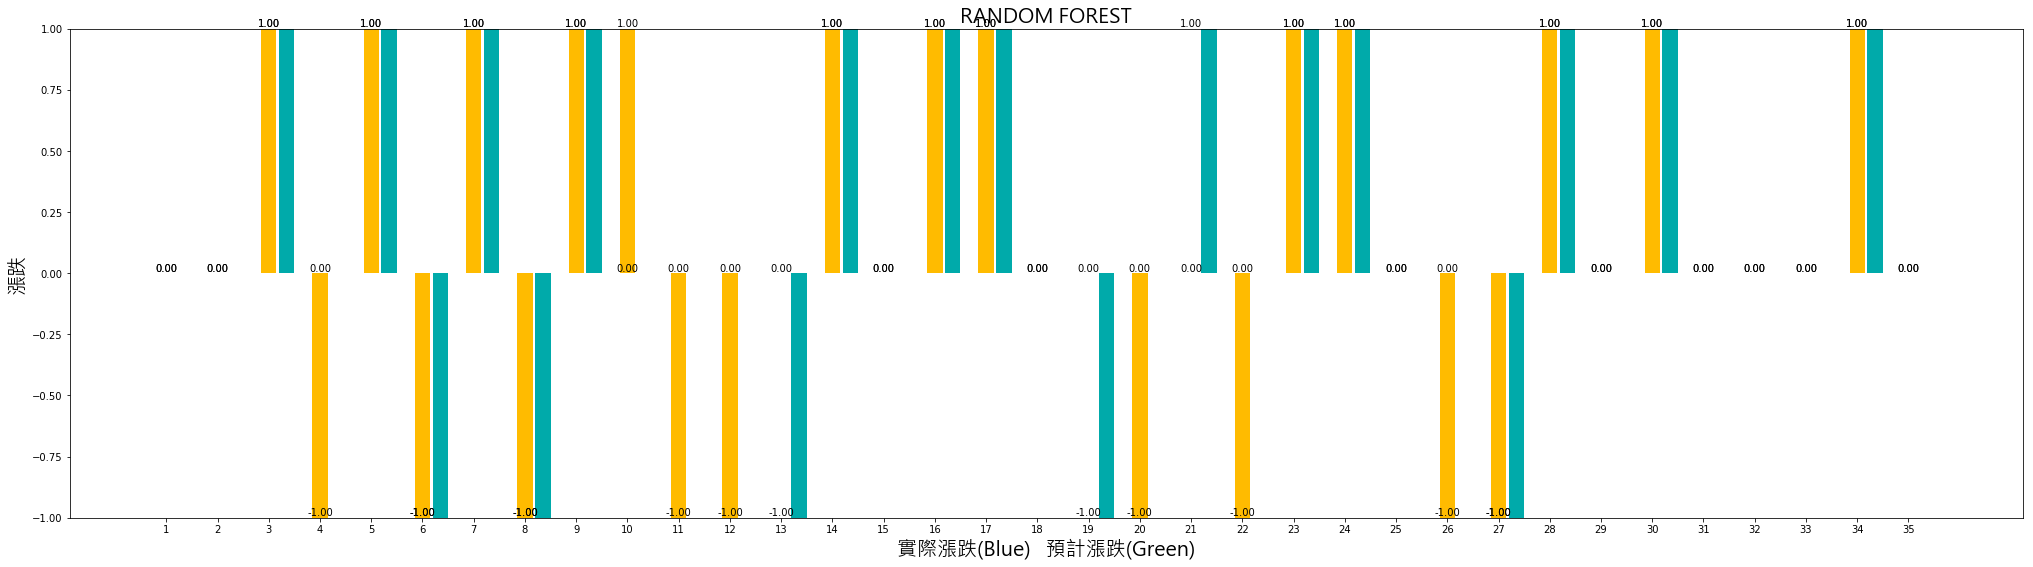

In [39]:
plt.figure(figsize=(35,9))
n = 35

X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')
plt.bar(X+0.35,f1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(Green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('RANDOM FOREST',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,f1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<p style="font-weight:bold;color:#003C9D;">C. SVM 實際VS預計</p>

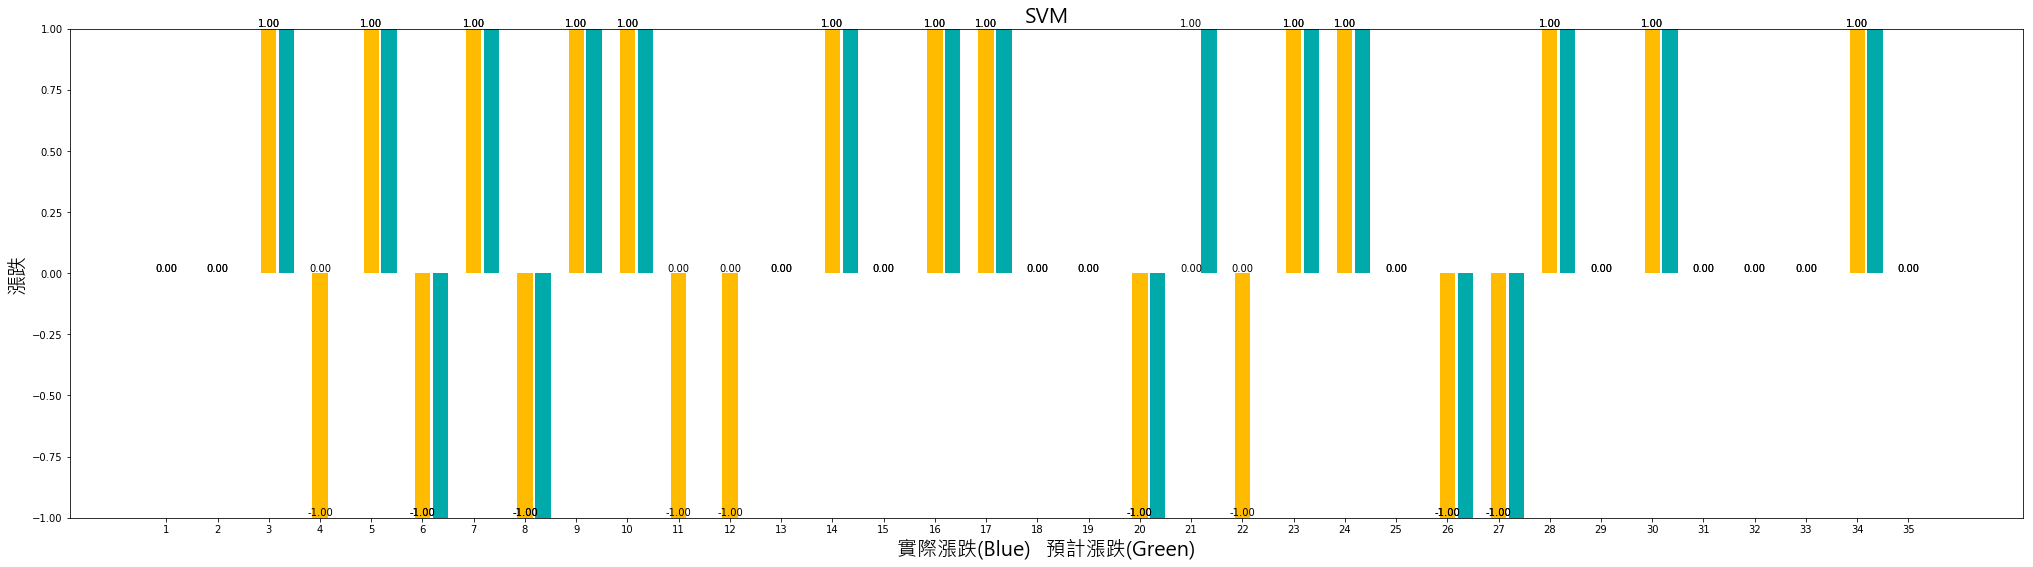

In [40]:
plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')
plt.bar(X+0.35,g1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(Green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('SVM',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,g1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<p style="font-weight:bold;color:#003C9D;">D. Voting 實際VS預計</p>

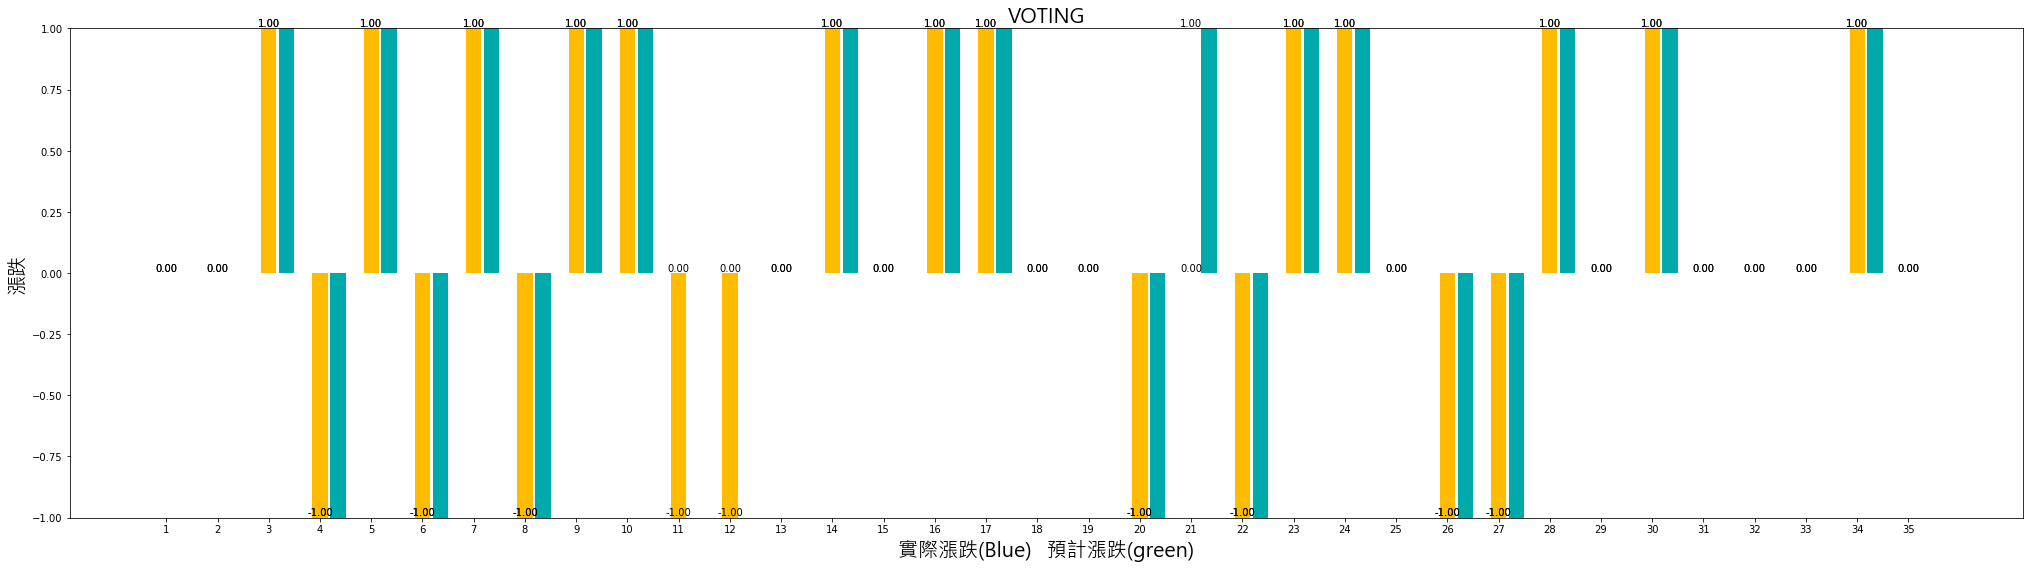

In [41]:
plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white')
plt.bar(X+0.35,m1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('VOTING',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,m1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<p style="font-weight:bold;color:#003C9D;">E. XGBoost 實際VS預計</p>

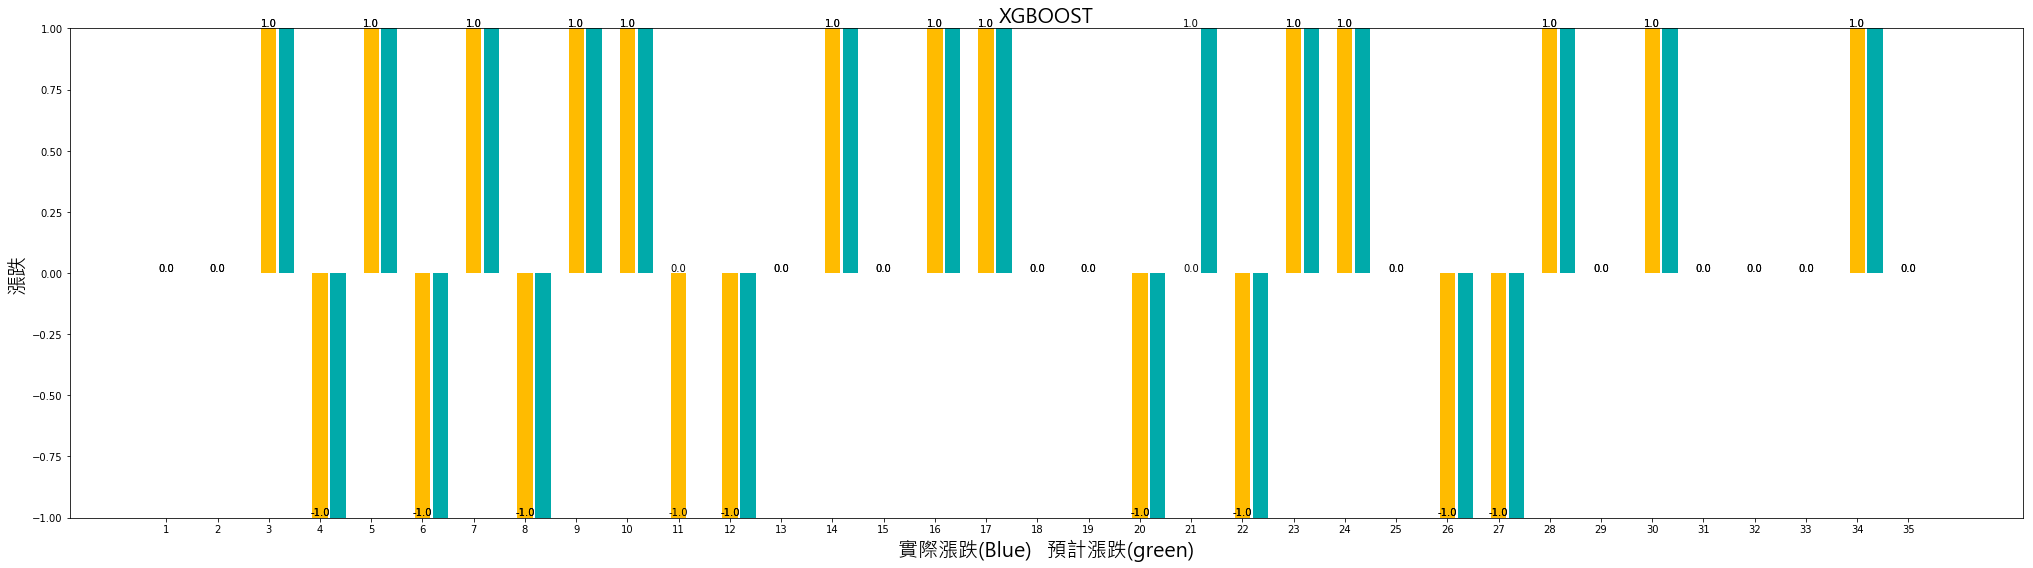

In [42]:
plt.figure(figsize=(35,9))
n = 35
X = np.arange(n)+1
objects = range(1,36)
y_pos = np.arange(len(objects))
plt.bar(X,t1,width = 0.3,facecolor = '#FFBB00',edgecolor = 'white' )
plt.bar(X+0.35,o1,width = 0.3,facecolor = '#00AAAA',edgecolor = 'white')
plt.xlabel('實際漲跌(Blue)   預計漲跌(green)',fontproperties=font, fontsize=20 )
plt.ylabel('漲跌',fontproperties=font, fontsize=20)
plt.xticks(y_pos+1, objects)
plt.title('XGBOOST',fontproperties=font, fontsize=20)

for x,y in zip(X,t1):
    plt.text(x, y, '%.1f' % y,  ha='center', va= 'bottom')

for x,y in zip(X,o1):
    plt.text(x, y, '%.1f' % y, ha='center', va= 'bottom')
    
plt.ylim(-1,1)
plt.show()

<a href="#索引">回索引</a>